In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('AAME.csv')

In [29]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [30]:
data = df[['Open', 'High', 'Low', 'Close']].dropna()

In [31]:
data.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [32]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [34]:
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length][0])
    return np.array(x), np.array(y)


In [35]:
sequence_length = 10
x, y = create_sequences(scaled_data, sequence_length)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False
)


In [37]:
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(sequence_length, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
history = model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split=0.1)


Epoch 1/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - loss: 0.0072 - val_loss: 2.2976e-04
Epoch 2/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.0048 - val_loss: 9.8009e-05
Epoch 3/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.0038 - val_loss: 4.5616e-05
Epoch 4/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.0034 - val_loss: 4.9059e-05
Epoch 5/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.0039 - val_loss: 4.1798e-05
Epoch 6/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.0035 - val_loss: 3.5292e-05
Epoch 7/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.0033 - val_loss: 6.4382e-05
Epoch 8/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.0041 - val_loss: 1.2875e-04
Epoch 9/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.0033 - val_loss: 3.5466e-05
Epoch 10/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.0035 - val_loss: 4.1841e-05
Epoch 11/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.0039 - val_los

In [39]:
y_pred = model.predict(x_test)

open_scaler = MinMaxScaler()
open_scaler.min_, open_scaler.scale_ = scaler.min_[0], scaler.scale_[0]  # Open만 복원
y_test_inverse = y_test / open_scaler.scale_ + open_scaler.min_
y_pred_inverse = y_pred.flatten() / open_scaler.scale_ + open_scaler.min_


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step


In [40]:
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f"MSE: {mse}")

MSE: 0.010695976948988882


/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning

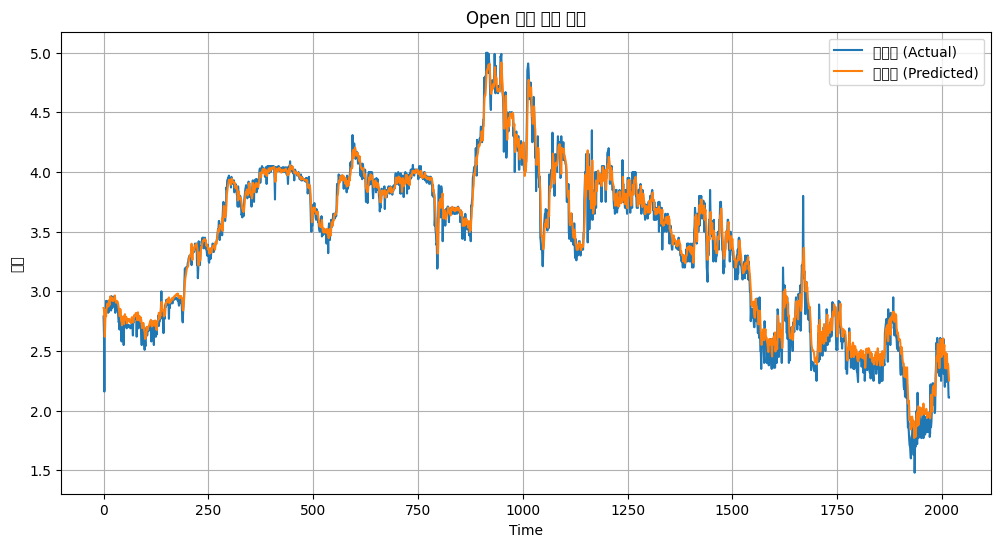

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='실제값 (Actual)')
plt.plot(y_pred_inverse, label='예측값 (Predicted)')
plt.title('Open 가격 예측 비교')
plt.xlabel('Time')
plt.ylabel('가격')
plt.legend()
plt.grid(True)
plt.show()